## Imports
We're gonna here import our tools to work with this datasets in Visualization: some that will come handy are: Polars (for increased performace), seaborn and altair for data visualization

In [1]:
import polars as pl
import matplotlib.pyplot as plt
import psycopg2
from dotenv import load_dotenv
load_dotenv()
import os
import seaborn as sns
import altair as alt
alt.data_transformers.enable("vegafusion")

DataTransformerRegistry.enable('vegafusion')

In [9]:
import vegafusion as vf

In [5]:
user = os.getenv('POSTGRES_USER')
password = os.getenv('POSTGRES_PASSWORD')
host = os.getenv('DB_HOST')
port = os.getenv('DB_PORT')
dbname = os.getenv('POSTGRES_DB')

uri = f"postgresql://{user}:{password}@{host}:{port}/{dbname}"

df_pie = pl.read_database_uri("SELECT event_type, COUNT (*) FROM customers GROUP BY event_type", uri)

In [6]:
df_pie.head()

event_type,count
str,i64
"""cart""",5486521
"""purchase""",1286088
"""remove_from_cart""",2748980
"""view""",9654310


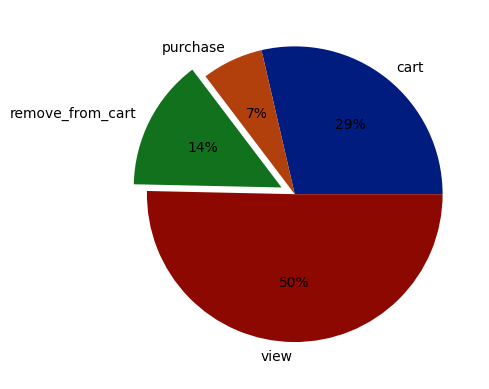

In [17]:
# declaring exploding pie
explode = [0, 0, 0.1, 0]
# define Seaborn color palette to use
palette_color = sns.color_palette('dark')

# plotting data on chart
plt.pie(df_pie['count'], labels=df_pie['event_type'], colors=palette_color, explode=explode,
        autopct='%.0f%%')

# displaying chart
plt.show()